In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
import torch
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
line_imgs = np.load('./line/line_imgs.npy')
line_labs = np.load('./line/line_labs.npy')
line_imgs = line_imgs.astype(np.float32)
line_labs = line_labs.astype(np.float32)
print(line_imgs.shape)
print(line_labs.shape)
line_imgs = line_imgs.reshape(-1,1,16,16)
line_labs = line_labs.reshape(-1,1)
print(line_imgs.shape)
print(line_labs.shape)
x_torch = Variable(torch.from_numpy(line_imgs))
y_torch = Variable(torch.from_numpy(line_labs))
print(x_torch.shape[0])

(64, 16, 16)
(64,)
(64, 1, 16, 16)
(64, 1)
64


In [3]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.conv1 = torch.nn.Conv2d(1,16,kernel_size = 7)
        self.conv2 = torch.nn.Conv2d(16,8,kernel_size = 7)
        self.fc = torch.nn.Linear(8*16,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        in_size = x.size(0)
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = x.view(in_size,-1)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x
    
model = Model()

for m in model.modules():
    if isinstance(m,torch.nn.Linear):
        torch.nn.init.normal(m.weight,mean=0,std=0.1)
        torch.nn.init.constant(m.bias,0.1)
        
criterion = torch.nn.BCELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(),lr=0.1) 

loss_array = []
accuracy_array = []
for epoch in range(1000):
    outputs = model(x_torch)
    loss = criterion(outputs, y_torch)

    y_pred = outputs.clone()
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0
    acc = torch.sum(torch.isclose(y_pred,y_torch)).item()/y_torch.shape[0]
#     if epoch % 100 == 0:
    print(epoch,loss.item())
    print(epoch,acc)
    
    loss_array.append(loss)
    accuracy_array.append(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


0 0.6770011782646179
0 0.6875
1 0.6419239044189453
1 0.875
2 0.6089578866958618
2 0.90625
3 0.5684877634048462
3 0.9375
4 0.5078251361846924
4 0.9375
5 0.4395344853401184
5 0.890625
6 0.4322402775287628
6 0.828125
7 0.7749418020248413
7 0.578125
8 0.49360695481300354
8 0.75
9 0.41771504282951355
9 0.9375
10 0.32555434107780457
10 0.921875
11 0.26030582189559937
11 0.9375
12 0.22109147906303406
12 0.953125
13 0.1946812868118286
13 0.953125
14 0.1733289659023285
14 0.953125
15 0.1561403125524521
15 0.96875
16 0.14137835800647736
16 0.984375
17 0.12872637808322906
17 0.984375
18 0.11774680018424988
18 0.984375
19 0.1094948798418045
19 0.984375
20 0.11096477508544922
20 0.984375
21 0.16400043666362762
21 0.9375
22 0.6420820951461792
22 0.71875
23 1.1890337467193604
23 0.59375
24 0.3610089123249054
24 0.90625
25 0.2815738916397095
25 0.9375
26 0.22193138301372528
26 0.9375
27 0.17987844347953796
27 0.9375
28 0.15160131454467773
28 0.9375
29 0.13122695684432983
29 0.9375
30 0.115981429815292

271 0.0006305030547082424
271 1.0
272 0.0006270573940128088
272 1.0
273 0.0006236503832042217
273 1.0
274 0.0006202692165970802
274 1.0
275 0.0006169243133626878
275 1.0
276 0.0006136107258498669
276 1.0
277 0.0006103268824517727
277 1.0
278 0.0006070730742067099
278 1.0
279 0.000603855587542057
279 1.0
280 0.0006006539333611727
280 1.0
281 0.0005974118248559535
281 1.0
282 0.0005941948038525879
282 1.0
283 0.0005909994943067431
283 1.0
284 0.0005878352094441652
284 1.0
285 0.0005847045104019344
285 1.0
286 0.0005816049524582922
286 1.0
287 0.0005785481189377606
287 1.0
288 0.000575495243538171
288 1.0
289 0.0005724846269004047
289 1.0
290 0.0005695028812624514
290 1.0
291 0.0005665512289851904
291 1.0
292 0.0005636218702420592
292 1.0
293 0.0005607237108051777
293 1.0
294 0.0005578639102168381
294 1.0
295 0.0005550141213461757
295 1.0
296 0.0005521988496184349
296 1.0
297 0.0005494053475558758
297 1.0
298 0.0005466307047754526
298 1.0
299 0.0005438915104605258
299 1.0
300 0.0005411740

528 0.00024256898905150592
528 1.0
529 0.00024193857097998261
529 1.0
530 0.0002413221081951633
530 1.0
531 0.00024070381186902523
531 1.0
532 0.000240084613324143
532 1.0
533 0.0002394756447756663
533 1.0
534 0.00023886948474682868
534 1.0
535 0.0002382559032412246
535 1.0
536 0.0002376608899794519
536 1.0
537 0.0002370603324379772
537 1.0
538 0.00023646073532290757
538 1.0
539 0.00023586390307173133
539 1.0
540 0.00023527268785983324
540 1.0
541 0.00023468330618925393
541 1.0
542 0.0002340939681744203
542 1.0
543 0.00023351673735305667
543 1.0
544 0.00023292924743145704
544 1.0
545 0.0002323464141227305
545 1.0
546 0.00023177385446615517
546 1.0
547 0.00023119196703191847
547 1.0
548 0.0002306315436726436
548 1.0
549 0.00023005431285127997
549 1.0
550 0.0002294836303917691
550 1.0
551 0.00022892789274919778
551 1.0
552 0.00022836834250483662
552 1.0
553 0.00022780698782298714
553 1.0
554 0.00022725587768945843
554 1.0
555 0.0002266964002046734
555 1.0
556 0.000226148113142699
556 1.0

787 0.0001423998037353158
787 1.0
788 0.0001421686465619132
788 1.0
789 0.00014192629896569997
789 1.0
790 0.0001416951563442126
790 1.0
791 0.0001414612343069166
791 1.0
792 0.00014122168067842722
792 1.0
793 0.00014099053805693984
793 1.0
794 0.00014076217485126108
794 1.0
795 0.00014053290942683816
795 1.0
796 0.00014030266902409494
796 1.0
797 0.00014007245772518218
797 1.0
798 0.00013983760436531156
798 1.0
799 0.0001396157604176551
799 1.0
800 0.00013938928896095604
800 1.0
801 0.00013915816089138389
801 1.0
802 0.0001389288663631305
802 1.0
803 0.00013870517432224005
803 1.0
804 0.00013847867376171052
804 1.0
805 0.00013825406495016068
805 1.0
806 0.00013802757894154638
806 1.0
807 0.00013780670997221023
807 1.0
808 0.00013758674322161824
808 1.0
809 0.00013736585970036685
809 1.0
810 0.00013714309898205101
810 1.0
811 0.00013692314678337425
811 1.0
812 0.00013670319458469748
812 1.0
813 0.00013648788444697857
813 1.0
814 0.00013626604049932212
814 1.0
815 0.0001360470341751352


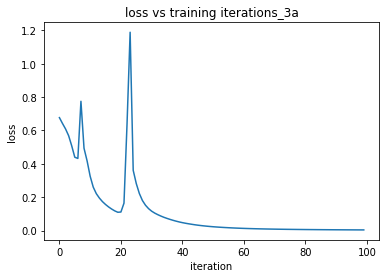

In [5]:
x = np.arange(0,100,1)
y = loss_array[:100]
fig = plt.figure()
plt.plot(x,y)
plt.title('loss vs training iterations_3a')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.savefig('3a_loss')

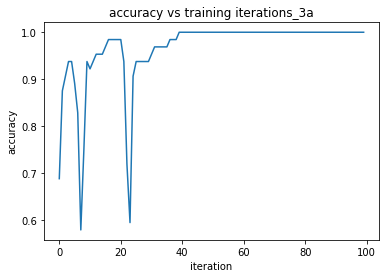

In [6]:
x = np.arange(0,100,1)
y = accuracy_array[:100]
fig = plt.figure()
plt.plot(x,y)
plt.title('accuracy vs training iterations_3a')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig('3a_accuracy')